<a href="https://colab.research.google.com/github/rishabh102004/nmep-stuff/blob/main/Copy_of_For_Student_ML_Part_1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifier Comparison**

Adapted by Jerry O'Connor and Reuben Thomas for Neurotech@Berkeley, based off of [code](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) written by Gaël Varoquaux and Andreas Müller.

A comparison of a several classifiers in scikit-learn on synthetic datasets. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated by linear decision boundaries. Here, simpler classifiers, such as the linear SVMs discussed in lecture, produce better generalization than more complex models.  

## Import relevant libraries and classes from libraries
Numpy and Matplot are standard data science tools, and we'll be using scikit-Learn (sklearn) as our ML library.

In [1]:
# Basic numpy and matplotlib imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# SKlearn imports
from sklearn.preprocessing import StandardScaler        # not always necessary
from sklearn.pipeline import make_pipeline              # not always necessary
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split


### classifier imports (you can ignore all of these for now)
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

# Classifiers: Names and Models

In [2]:
# Classifier names (str)
names = [
    "Naive Bayes",
    "Nearest Neighbors",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "Nonlinear (RBF) SVM", # radial basis function - nonlinear
    "Fully-Connected Neural Net",
]

# Models -- instantiated classifier objects
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel = "rbf", gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB()
]

**Question 1:** These models are listed from simplest to most complex. How does the 'complexity' of a model (a general measure of its internal structure and number of parameters) affect its ability to work with different kinds of data?

Think about why sometimes a simpler model might be better and other times a more complex model is needed. Consider how easy it is to understand what the model is doing, how well it avoids learning the data too closely (overfitting), how much computing power it needs, and how well it can make predictions on new, unseen data.


**Response:**
a simpler model may be better if the data is pretty binary in what you are trying to classify (for example dogs and cats) and you need to cut down on processing speed. A more complex model is more advantageous if the data is more nuanced, so that the model can make better predictions on new data.

# Generate Synthetic Datasets
You can ignore this process entirely. It may never be relevant to you, but you can read more about the use of synthetic data [here](https://opendatascience.com/the-expanding-importance-of-synthetic-data/).

When we do use synthetic data, it will likely be generated through a synthetic board from a library like BrainFlow, rather than randomly generating a distribution as is being done below.

In [3]:
# Get our input dataset and output labels
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [4]:
# Load datasets based on earlier imports and X, y data
# Again, you can ignore this process and consider just the final composition of datasets (a list of datasets)
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

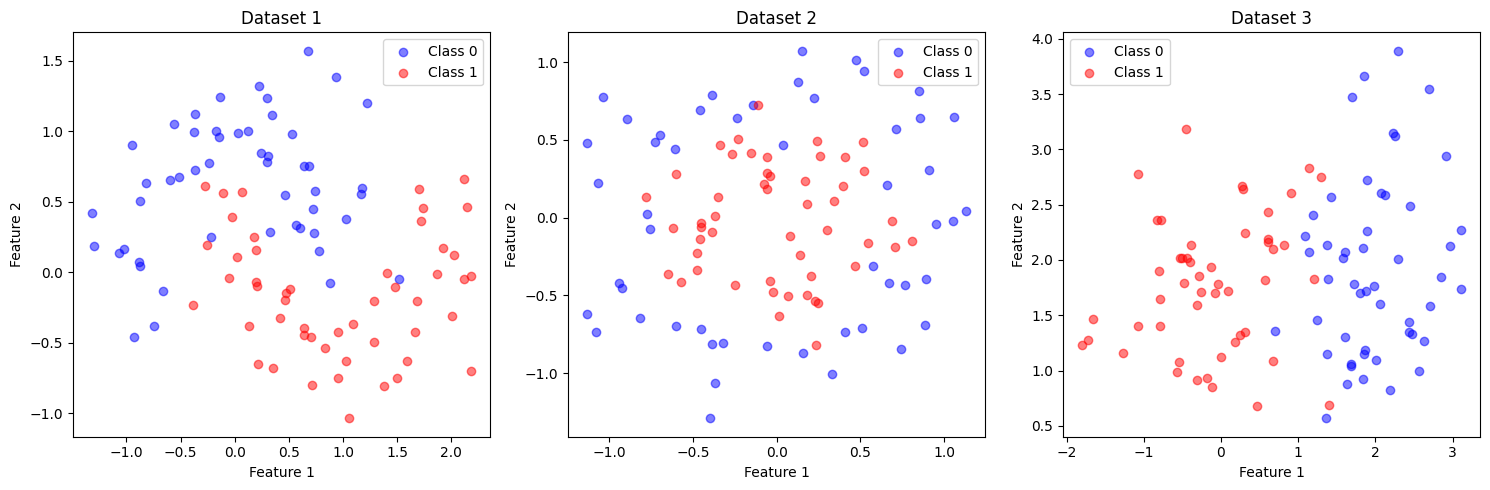

In [5]:
### Plot the datasets to see what they look like

def plot_datasets(dataset1, dataset2, dataset3):
    """
    Plots three datasets side by side. Each dataset contains 2D coordinates (X) and binary labels (Y).

    Parameters:
    dataset1, dataset2, dataset3 (tuple): Each tuple contains X (2D coordinates) and Y (binary labels).
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for ax, (X, Y), title in zip(axes, [dataset1, dataset2, dataset3], ['Dataset 1', 'Dataset 2', 'Dataset 3']):
        # Scatter plot for each class
        ax.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], c='blue', label='Class 0', alpha=0.5)
        ax.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], c='red', label='Class 1', alpha=0.5)
        ax.set_title(title)
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend()

    plt.tight_layout()
    plt.show()

plot_datasets(datasets[0], datasets[1], datasets[2])


# Training and Test Data split

Splitting the training and test data helps us make sure that our training data is not overfitting to the training data we give it!

### Test vs Validation
- Best practice is to split training and testing data
- Avoids testing on data that’s been “seen” before
- Common: 80/20 split
- Random, representative sampling to avoid bias
We split training data into test data for validation!

In [6]:
def demo_train_test_split(X,y, test_size):
  # TODO: implement a function in numpy and/or pandas to generate a valid train/test split
  pass

In [8]:
from sklearn.model_selection import train_test_split
# important -> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Get linear dataset
X, y = datasets[2]

# Test train split
X_train, X_test, y_train, y_test = demo_train_test_split(
        X, y, test_size = .02) # 20% of data to training



X_train.shape, X_test.shape, y_train.shape, y_test.shape # shows us the sizes of data

TypeError: cannot unpack non-iterable NoneType object

# Simplistic Implementation of Linear SVM Classifier

In [9]:
from sklearn import metrics

from sklearn.svm import SVC # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
                            # Other related:
                            # - https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

# TODO: WHICH KERNEL TYPE ARE WE USING? (WHAT DOES THE DECISION BOUNDARY LOOK LIKE FOR THIS CLASSIFIER TYPE?)
svc_classifier = SVC(kernel='linear', C=0.025) # can use other kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

In [10]:
# train
svc_classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# Predict classifications for test dataset
y_pred = svc_classifier.predict(X_test)

# Accuracy
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.82      0.90        11

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20



**Question 2**: What is the accuracy score for this model and what is the score for the corresponding model in the set of plots? How do they compare?

The accuracy score of this model is 91% and the score of the corresponding model in the set of plots is 90%.

# Plot

Upon running the following code cell, you will observe that plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

Comments have been added to increase readibility. As you parse through, ignore all calls to plotting and formatting functions (anything from plt).

In [11]:
figure = plt.figure(figsize=(27, 9))
i = 1

# iterate over datasets from before
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds

    # This function splits our dataset into training and testing data automatically
    # TODO: think about a way to implement a simple train_test_split() function using basic numpy and pandas functionality
    X_train, X_test, y_train, y_test = demo_train_test_split(
        X, y, test_size=0.4
    )

    # calc min and max of data
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")

    # plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    # plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # test each classifier
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        # Step with make_pipeline is optional
        clf = make_pipeline(StandardScaler(), clf)

        # Fit the model to training data
        clf.fit(X_train, y_train)

        # Test the classifier's predictions on test dataset
        # Calculate accuracy score based on test classification accuracy
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )

        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

TypeError: cannot unpack non-iterable NoneType object

<Figure size 2700x900 with 0 Axes>

**Question 3**: Based on the plots you produced, make some judgements about how well the Linear SVM captures the distributions in the datasets. By visual inspection, which plot shows the best separation of the data by the Linear SVM?

**Response:**
I can not judge these because there seems to be an error in the distribution of the datasets.

**Question 4**: Is this reflected by the accuracy scores in the bottom right corner? Does the Linear SVM perform the best (based on accuracy score) on the dataset you selected from above?

**Response:**
Again, cannot judge these because I do not have access to the plots in the bottom right corner.

**Question 5**: Recall our earlier discussion of model complexity. In the plot, our models are listed in ascending complexity from left to right. Is a more complex model necessarily always accurate? If not, is there a so-called "sweet spot" of complexity for this dataset? If we were to time the training and inference of our models, which take the longest?  

**Response:**
No, more complex models are not always the most accurate, because there is always a chance of overfitting if its too fit to the training data.